In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os

In [2]:
os.listdir("./data")

['DAX.csv',
 'TSLA.csv',
 'LTRPB.csv',
 'Walmart.csv',
 'SQ.csv',
 'ENPH.csv',
 'MKTX.csv',
 'XRP.csv',
 'AAPL.csv',
 'WKHS.csv',
 'GME.csv']

In [3]:
stock_data = []
for file in os.listdir("./data"):
    stock_data.append(pd.read_csv(f"./data/{file}"))
stock_data[0]

,Date,Close/Last,Volume,Open,High,Low
0,3/31/2021,32.5500,8332,32.4980,32.6000,32.495
1,3/30/2021,32.4623,37729,32.3800,32.5820,32.379
2,3/29/2021,32.2900,7038,32.3200,32.3300,32.230
3,3/26/2021,32.2150,8717,32.0200,32.2999,32.020
4,3/25/2021,31.8815,3163,31.5200,31.8840,31.520
...,...,...,...,...,...,...
247,4/7/2020,21.2900,72092,21.8700,21.8700,21.280
248,4/6/2020,20.9429,15185,20.6000,21.0000,20.568
249,4/3/2020,19.5969,168963,19.7400,19.7400,19.400
250,4/2/2020,19.7673,2323,20.0978,20.0978,19.500


In [4]:
def read_stock_csv(stock_file):
    df = pd.read_csv(
        f"./data/{stock_file}",
        index_col="Date",
        parse_dates=True,
        infer_datetime_format=True)
    try:
        return df["Close/Last"].str.replace("$","").astype("float")
    except:
        return df["Close/Last"]

In [5]:
stock_data = []
stock_names = os.listdir("./data")
for file in stock_names:
    stock_data.append(read_stock_csv(file))
stock_data[0]

Date
2021-03-31    32.5500
2021-03-30    32.4623
2021-03-29    32.2900
2021-03-26    32.2150
2021-03-25    31.8815
               ...   
2020-04-07    21.2900
2020-04-06    20.9429
2020-04-03    19.5969
2020-04-02    19.7673
2020-04-01    19.6010
Name: Close/Last, Length: 252, dtype: float64

In [6]:
df = pd.concat(stock_data, axis="columns", join="inner")
df.columns = stock_names
df.tail()

,DAX.csv,TSLA.csv,LTRPB.csv,Walmart.csv,SQ.csv,ENPH.csv,MKTX.csv,XRP.csv,AAPL.csv,WKHS.csv,GME.csv
Date,,,,,,,,,,,
2020-04-07,21.2900,109.090,4.32,121.99,50.31,35.04,381.50,0.19965,64.8575,1.67,3.27
2020-04-06,20.9429,103.248,4.01,126.07,50.42,34.05,399.03,0.19783,65.6175,1.63,3.09
2020-04-03,19.5969,96.002,4.01,119.48,43.72,28.69,387.27,0.17881,60.3525,1.66,2.80
2020-04-02,19.7673,90.894,3.67,118.65,45.88,29.92,347.29,0.17871,61.2325,1.66,2.85
2020-04-01,19.6010,96.312,4.44,114.14,46.81,29.77,333.99,0.17486,60.2275,1.71,3.25


In [7]:
for stock in stock_data:
    print(stock.shape)

(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(365,)
(252,)
(252,)
(252,)


In [8]:
returns = df.sort_index().pct_change().dropna()
returns.head()

,DAX.csv,TSLA.csv,LTRPB.csv,Walmart.csv,SQ.csv,ENPH.csv,MKTX.csv,XRP.csv,AAPL.csv,WKHS.csv,GME.csv
Date,,,,,,,,,,,
2020-04-02,0.008484,-0.056255,-0.173423,0.039513,-0.019868,0.005039,0.039822,0.022018,0.016687,-0.029240,-0.123077
2020-04-03,-0.008620,0.056197,0.092643,0.006995,-0.047079,-0.041110,0.115120,0.000560,-0.014371,0.000000,-0.017544
2020-04-06,0.068684,0.075478,0.000000,0.055156,0.153248,0.186825,0.030366,0.106370,0.087237,-0.018072,0.103571
2020-04-07,0.016574,0.056582,0.077307,-0.032363,-0.002182,0.029075,-0.043932,0.009200,-0.011582,0.024540,0.058252
2020-04-08,0.011038,0.006215,-0.062500,-0.001230,0.133771,0.082477,0.037012,-0.004107,0.025595,0.053892,0.042813


In [9]:
returns.std().sort_values() * np.sqrt(252)

Walmart.csv    0.228297
DAX.csv        0.265583
AAPL.csv       0.367671
MKTX.csv       0.401679
SQ.csv         0.624582
TSLA.csv       0.766394
ENPH.csv       0.859405
WKHS.csv       1.360715
XRP.csv        1.498546
GME.csv        2.781795
LTRPB.csv      6.486817
dtype: float64

In [10]:
returns.corr()

,DAX.csv,TSLA.csv,LTRPB.csv,Walmart.csv,SQ.csv,ENPH.csv,MKTX.csv,XRP.csv,AAPL.csv,WKHS.csv,GME.csv
DAX.csv,1.000000,0.332396,-0.145134,0.144189,0.274057,0.280542,0.136107,0.087687,0.355280,0.184484,0.052889
TSLA.csv,0.332396,1.000000,0.059458,0.218430,0.446007,0.363969,0.272816,0.152479,0.485899,0.183761,0.069004
LTRPB.csv,-0.145134,0.059458,1.000000,0.001999,-0.043564,-0.055724,0.126388,-0.032157,0.002648,-0.004109,-0.046562
Walmart.csv,0.144189,0.218430,0.001999,1.000000,0.214754,0.155738,0.187230,0.105510,0.333488,0.040399,-0.048306
SQ.csv,0.274057,0.446007,-0.043564,0.214754,1.000000,0.487378,0.345939,0.224577,0.473705,0.147975,-0.078997
ENPH.csv,0.280542,0.363969,-0.055724,0.155738,0.487378,1.000000,0.163470,0.133488,0.374052,0.117327,-0.028536
MKTX.csv,0.136107,0.272816,0.126388,0.187230,0.345939,0.163470,1.000000,0.060920,0.390883,0.019385,0.056558
XRP.csv,0.087687,0.152479,-0.032157,0.105510,0.224577,0.133488,0.060920,1.000000,0.030436,0.140727,-0.035390
AAPL.csv,0.355280,0.485899,0.002648,0.333488,0.473705,0.374052,0.390883,0.030436,1.000000,0.132601,0.039572
WKHS.csv,0.184484,0.183761,-0.004109,0.040399,0.147975,0.117327,0.019385,0.140727,0.132601,1.000000,0.165530


<AxesSubplot:>

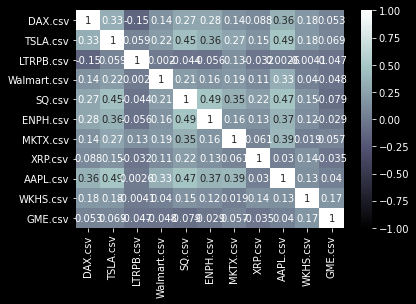

In [11]:
sns.heatmap(returns.corr(),vmin=-1, vmax=+1, annot=True, cmap="bone")

In [12]:
returns.drop(columns="AAPL.csv", inplace=True)

May need to remove SQ, TSLA, depending on other metrics

In [13]:
returns.head()

,DAX.csv,TSLA.csv,LTRPB.csv,Walmart.csv,SQ.csv,ENPH.csv,MKTX.csv,XRP.csv,WKHS.csv,GME.csv
Date,,,,,,,,,,
2020-04-02,0.008484,-0.056255,-0.173423,0.039513,-0.019868,0.005039,0.039822,0.022018,-0.029240,-0.123077
2020-04-03,-0.008620,0.056197,0.092643,0.006995,-0.047079,-0.041110,0.115120,0.000560,0.000000,-0.017544
2020-04-06,0.068684,0.075478,0.000000,0.055156,0.153248,0.186825,0.030366,0.106370,-0.018072,0.103571
2020-04-07,0.016574,0.056582,0.077307,-0.032363,-0.002182,0.029075,-0.043932,0.009200,0.024540,0.058252
2020-04-08,0.011038,0.006215,-0.062500,-0.001230,0.133771,0.082477,0.037012,-0.004107,0.053892,0.042813


In [14]:
(1+returns).cumprod().tail()

,DAX.csv,TSLA.csv,LTRPB.csv,Walmart.csv,SQ.csv,ENPH.csv,MKTX.csv,XRP.csv,WKHS.csv,GME.csv
Date,,,,,,,,,,
2021-03-25,1.626524,6.649120,6.657658,1.174084,4.453536,4.987571,1.490194,3.052671,7.935673,56.538462
2021-03-26,1.643539,6.424018,6.335586,1.183897,4.563128,5.108163,1.550346,3.193698,7.865497,55.692308
2021-03-29,1.647365,6.346976,6.335586,1.197389,4.425977,4.774605,1.546992,3.205593,7.561404,55.784615
2021-03-30,1.656155,6.599593,5.743243,1.189241,4.546678,5.058784,1.484326,3.124328,7.836257,59.833846
2021-03-31,1.660630,6.935065,8.563063,1.190030,4.850459,5.447094,1.490823,3.268558,8.052632,58.406154


In [17]:
returns.shape

(251, 10)

In [18]:
weights = [.1,.1,.1,.1,.1,.1,.1,.1,.1,.1]
portfolio_returns = returns.dot(weights)
portfolio_returns.tail()

Date
2021-03-25    0.065556
2021-03-26    0.004813
2021-03-29   -0.012907
2021-03-30    0.007470
2021-03-31    0.074304
dtype: float64

In [22]:
cumulative_portfolio_returns = (1+portfolio_returns).cumprod()

<AxesSubplot:xlabel='Date'>

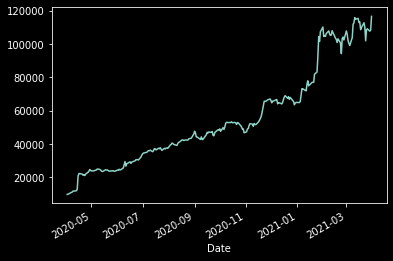

In [23]:
(10000 * cumulative_portfolio_returns).plot()

In [24]:
cumulative_portfolio_returns.std()

2.890019022488073

In [25]:
cumulative_portfolio_returns.iloc[-1]

11.65003978214266

In [26]:
(11.65-0.0168)/2.89

4.025328719723183

## removing GME from portfolio

In [29]:
no_gme_returns = returns.drop(columns="GME.csv")

In [32]:
weights = [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9]
no_gme_portfolio_returns = no_gme_returns.dot(weights)
no_gme_portfolio_returns.tail()

Date
2021-03-25    0.014293
2021-03-26    0.007010
2021-03-29   -0.014525
2021-03-30    0.000235
2021-03-31    0.085211
dtype: float64

In [33]:
no_gme_cumulative_portfolio_returns = (1+no_gme_portfolio_returns).cumprod()

In [35]:
no_gme_cumulative_portfolio_returns.tail()

Date
2021-03-25    6.543586
2021-03-26    6.589459
2021-03-29    6.493749
2021-03-30    6.495276
2021-03-31    7.048749
dtype: float64

<AxesSubplot:xlabel='Date'>

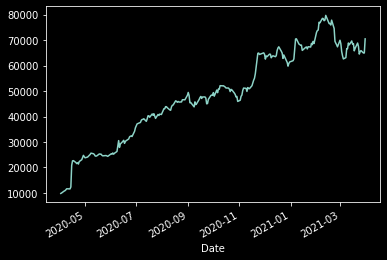

In [36]:
(10000 * no_gme_cumulative_portfolio_returns).plot()

In [37]:
no_gme_cumulative_portfolio_returns.std()

1.741856225011149

In [38]:
no_gme_cumulative_portfolio_returns.iloc[-1]

7.0487486040165885

In [40]:
(7.048-0.0168)/1.741

4.038598506605399

In [44]:
sp500 = pd.read_csv("./sp500.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)["Close/Last"]
sp500.head()


Date
2021-04-01    400.61
2021-03-31    396.33
2021-03-30    394.73
2021-03-29    395.78
2021-03-26    395.98
Name: Close/Last, dtype: float64

In [47]:
sp500_returns = sp500.sort_index().pct_change().dropna()
sp500_returns

Date
2020-04-02    0.023075
2020-04-03   -0.014454
2020-04-06    0.067166
2020-04-07    0.001019
2020-04-08    0.033568
                ...   
2021-03-26    0.016115
2021-03-29   -0.000505
2021-03-30   -0.002653
2021-03-31    0.004053
2021-04-01    0.010799
Name: Close/Last, Length: 252, dtype: float64

In [48]:
# [portfolio_returns, no_gme_portfolio_returns, sp500_returns]
portfolio_cov = portfolio_returns.cov(sp500_returns)
no_gme_cov = no_gme_portfolio_returns.cov(sp500_returns)

market_var = sp500.var()

portfolio_beta = portfolio_cov/market_var
no_gme_beta = no_gme_cov/market_var

print(f"portfolio beta: {portfolio_beta}")
print(f"no_gme beta: {no_gme_beta}")

portfolio beta: 8.252810012930898e-08
no_gme beta: 9.127603546652055e-08


In [49]:
sp500_returns.std()

0.012873435659288958

In [50]:
no_gme_portfolio_returns.std()

0.05084539305126517

In [51]:
portfolio_returns.std()

0.04871878394908127